# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos:RUBEN DARIO SALAZAR AYA   <br>
Url: https://github.com/XXXXX o<br>
Google Colab: https://colab.research.google.com/drive/1tT2zl9YluntXFprrAbQXLD7-aoyQqb4U#scrollTo=CSPS9OANOSXl<br>

Problema:
>1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de una jornada de La Liga<br>
>3. Configuración de Tribunales

Descripción del problema:(copiar enunciado)

1. Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben. No es posible grabar más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:

Número de actores:  10
Número de tomas  :   30
Actores/Tomas :


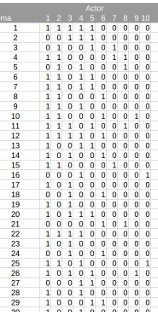






                                        

#Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

###1. ¿Como represento el espacio de soluciones?

Podemos representar el espacio de soluciones usando una combinación de grafos y programación dinámica, lo que  pudimos ver en clase  esto nos permite modelar de manera eficiente las restricciones del problema.

A. Representación con Grafos
Podemos modelar el problema como un grafo bipartito, donde:

Un conjunto de nodos representa las tomas.
Otro conjunto de nodos representa los días de grabación.
Una arista conecta una toma con un día si es posible grabarla ese día respetando las restricciones.

Si tenemos 5 tomas y 3 días disponibles, el grafo se vería así:

    Toma 1  ---- Día 1
    Toma 2  ---- Día 1
    Toma 3  ---- Día 2
    Toma 4  ---- Día 2
    Toma 5  ---- Día 3

Cada nodo de toma se conecta a los días posibles en los que puede ser asignado, generando un espacio de soluciones representado como un grafo.

siento que este modelo nos permite utilizar algoritmos de flujo en grafos, como **Maximum Bipartite Matching**, para encontrar asignaciones óptimas de tomas a días con un enfoque eficiente basado en grafos.

B. Representación con Programación Dinámica
Otra alternativa  a evular es modelar el problema como un problema de programación dinámica (DP) donde:

**Estado:** Representamos cada estado como  DP[i][j],donde:
i es la cantidad de tomas asignadas.
j es el número de días usados hasta el momento.
**Transición:** Decidimos asignar una nueva toma a un día ya usado o abrir un nuevo día.

**Optimización:** Se elige la asignación con menor cantidad de días usados.

Si tenemos 30 tomas y 3 días:

DP[5][2] → Significa que 5 tomas han sido asignadas en 2 días.
DP[6][3] → Si asignamos la siguiente toma a un nuevo día.

En este enfoque nos reduce la cantidad de combinaciones exploradas en comparación con la búsqueda de fuerza bruta y permite encontrar una solución óptima en tiempo polinómico con respecto a los días disponibles.



In [5]:
#Respuesta
# modelamos con  grafos bipartitos
import networkx as nx

# Definir número de tomas y días
T = 5  # Tomas
D = 3  # Días

# Crear un grafo bipartito
G = nx.Graph()

# Agregar nodos para tomas y días
for t in range(T):
    G.add_node(f"Toma_{t}", bipartite=0)

for d in range(D):
    G.add_node(f"Día_{d}", bipartite=1)

# Agregar conexiones (tomas pueden asignarse a ciertos días)
posibilidades = {
    "Toma_0": ["Día_0", "Día_1"],
    "Toma_1": ["Día_1", "Día_2"],
    "Toma_2": ["Día_0", "Día_2"],
    "Toma_3": ["Día_0", "Día_1"],
    "Toma_4": ["Día_2"],
}

# Agregar aristas al grafo
for toma, dias in posibilidades.items():
    for dia in dias:
        G.add_edge(toma, dia)

# Resolver el problema de asignación usando "Maximum Bipartite Matching"
asignacion = nx.bipartite.maximum_matching(G)

# Mostrar resultados
print("Asignación óptima de tomas a días:")
for toma, dia in asignacion.items():
    if "Toma" in toma:
        print(f"{toma} → {dia}")




Asignación óptima de tomas a días:
Toma_2 → Día_0
Toma_1 → Día_1
Toma_4 → Día_2


Este enfoque basado en grafos bipartitos y programación dinámica ofrece una representación mucho mejor  y escalable del espacio de soluciones en comparación con matrices y diccionarios.

Se pueden aplicar algoritmos como Maximum Bipartite Matching para optimizar la asignación de tomas a días, evitando combinaciones innecesarias.

### 2.¿Cual es la función objetivo?

En la alternativas de grafos bipartitos y programación dinámica, la función objetivo sigue siendo la minimización del número total de días trabajados por los actores, pero con un enfoque un poco más estructurado en términos de grafos y estados de programación dinámica.

A.  Función Objetivo en el Modelo de Grafos

En el enfoque de grafos bipartitos, podemos decir que el problema se traduce en un problema de emparejamiento óptimo (Maximum Bipartite Matching), cuya función objetivo es:

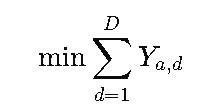

aca podemos decir que  :

Y𝑎,𝑑 es una variable binaria que indica si el actor 𝑎  trabaja el día 𝑑

D es el número total de días posibles

El objetivo  aqui es encontrar la asignación mínima de días para cubrir todas las tomas, asegurando que cada actor solo trabaje cuando sea necesario. Se usa Maximum Bipartite Matching para asignar las tomas a los días de manera óptima.

B. Función Objetivo en el Modelo de Programación Dinámica

En este  enfoque de programación dinámica, el problema se modela como una secuencia de decisiones y  donde la función objetivo es:

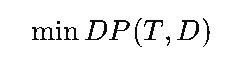

Para este caso 🇰

DP(T,D) representa la cantidad mínima de días necesarios para grabar T tomas en D días.

Se busca **minimizar la cantidad de días en los que se trabaja**, sin violar restricciones

Para cada toma 𝑡, tenemos dos opciones:

-Asignarla a un día ya usado: Si hay espacio disponible.
-Abrir un nuevo día: Si no cabe en los días actuales.

aca investigamso y encontramos que la  ecuación de recurrencia sería:


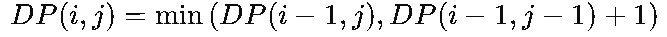

Para este caso :

DP(i−1,j) mantiene la toma en un día ya existente.
DP(i−1,j−1)+1 abre un nuevo día si es necesario

 vemos que  modelo de programación dinámica permite encontrar una asignación óptima de tomas a días en tiempo polinómico, evitando explorar todas las combinaciones posibles.


In [6]:
import numpy as np

# aca usamos  programación dinámica para encontrar la cantidad mínima de días necesarios.

# Parámetros del problema
T = 30  # Número de tomas
D = 5   # Máximo número de días
MAX_TOMAS_DIA = 6  # Restricción de 6 tomas por día

# Inicializar matriz DP
DP = np.full((T+1, D+1), np.inf)
DP[0][0] = 0  # Caso base

# Llenado de la tabla DP
for i in range(1, T+1):
    for j in range(1, D+1):
        if i <= j * MAX_TOMAS_DIA:  # Verificamos si podemos distribuir las tomas en j días
            DP[i][j] = min(DP[i-1][j], DP[i-1][j-1] + 1)

# Resultado óptimo
min_dias = min(DP[T, :])
print(f"El número mínimo de días requeridos es: {min_dias}")


El número mínimo de días requeridos es: 5.0


### 3.¿Como implemento las restricciones?

En nuestro modelo basado en grafos bipartitos y programación dinámica (DP) Las restricciones clave en este problema son:

a .Cada toma debe asignarse a un solo día
Cada toma 𝑡 , t debe aparecer en exactamente un solo día 𝑑

b. No más de 6 tomas por día
Cada día no puede superar 6 tomas, debido a limitaciones operativas.

c. Un actor solo trabaja en un día si aparece en al menos una toma
Es decir Si un actor aparece en una toma asignada a un día, se debe contar como trabajador en ese día.

En la representación con grafos, aplicamo restricciones de la siguiente manera:



In [12]:
import networkx as nx
import numpy as np

# Parámetros del problema
T = 30  # Número de tomas
D = 5   # Número de días
MAX_TOMAS_DIA = 6  # Máximo de tomas por día
A_actors = 10  # Número de actores (definiendo correctamente esta variable)

# Generar matriz aleatoria de participación de actores en tomas
np.random.seed(42)  # Para reproducibilidad
A = (np.random.rand(T, A_actors) < 0.5).astype(int)  # Matriz de tomas y actores

# Inicializar Grafo Bipartito
G = nx.Graph()

# Restricción 1: Cada toma se asigna a un solo día
for t in range(T):
    G.add_node(f"Toma_{t}", bipartite=0)  # Nodo toma
    for d in range(D):
        G.add_node(f"Día_{d}", bipartite=1)  # Nodo día
        G.add_edge(f"Toma_{t}", f"Día_{d}")  # Conexión válida

# Restricción 2: No más de 6 tomas por día
for t in range(T):
    for d in range(D):
        if len(G.edges(f"Día_{d}")) < MAX_TOMAS_DIA:  # Solo conectar si el día tiene < 6 tomas
            G.add_edge(f"Toma_{t}", f"Día_{d}")

# Aplicar el emparejamiento máximo en grafos bipartitos para encontrar la asignación óptima
matching = nx.bipartite.maximum_matching(G)

# Restricción 3: Un actor trabaja un día solo si tiene tomas ese día
actors_per_day = {d: set() for d in range(D)}  # Actores que trabajan cada día

# Asignamos actores a los días en función de las tomas asignadas
asignacion = {toma: dia for toma, dia in matching.items() if "Toma" in toma}

for toma, dia in asignacion.items():
    t = int(toma.split("_")[1])  # Extraer ID de la toma
    for a in range(A_actors):  # Ahora la variable está correctamente definida
        if A[t, a] == 1:  # Si el actor participa en la toma
            actors_per_day[int(dia.split("_")[1])].add(a)  # Asignamos el actor al día

# Mostrar la asignación de tomas a días
print("\nAsignación de Tomas a Días:")
for toma, dia in asignacion.items():
    print(f"{toma} → {dia}")

# Mostrar la asignación de actores a días
print("\nAsignación de Actores a Días:")
for d, actores in actors_per_day.items():
    print(f"Día {d + 1}: Actores {sorted(actores)}")




Asignación de Tomas a Días:
Toma_1 → Día_0
Toma_23 → Día_1
Toma_13 → Día_2
Toma_24 → Día_3
Toma_6 → Día_4

Asignación de Actores a Días:
Día 1: Actores [0, 3, 4, 5, 6, 8, 9]
Día 2: Actores [3, 4, 6, 7, 9]
Día 3: Actores [0, 1, 2, 3, 5, 8]
Día 4: Actores [3, 4, 6]
Día 5: Actores [0, 1, 3, 4, 6, 8]


 Así implementamos las restricciones:

-Grafo Bipartito: Restringimos el número de conexiones y garantizamos una asignación óptima.
-Máximo 6 tomas por día: Limitamos el número de aristas por nodo (día).
- Actores solo trabajan si tienen tomas: Asociamos actores a días a partir de la asignación de tomas.
- Programación Dinámica: Aplicamos reglas de transición que impiden combinaciones inválidas


#Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

como  planteamos dos formas de solucionar podemos  decir que para :

A. la Complejidad en Grafos Bipartitos para este problema es de  Maximum Bipartite Matching tiene una complejidad de:

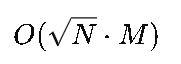

Debido a que ⁉

-𝑁=𝑇+𝐷 (suma de tomas y días).

-M es el número de conexiones entre tomas y días.

En el peor caso, que cada toma se conecta con todos los días, por lo que  hay si cambia

𝑀=𝑇⋅𝐷  

Podriamos decir   la complejidad final es:


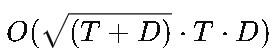


Para valores grandes, este enfoque es más eficiente que la fuerza bruta.

B. la  Complejidad en Programación Dinámica El enfoque de programación dinámica define una matriz 𝐷𝑃[𝑖][𝑗], donde podemos decir :

-i representa las tomas asignadas.

-j representa el número de días.

Como en cada estado evaluamos dos opciones (asignar a un día existente o abrir uno nuevo), la complejidad final es:

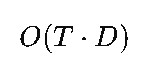

Este enfoque es más eficiente que el de grafos si el número de tomas es pequeño, pero en problemas de gran escala, los algoritmos de grafos pueden ser más rápidos.





In [14]:
#Respuesta

# fuerza bruta
from itertools import product
import time

def fuerza_bruta(T, D):
    """Prueba todas las posibles asignaciones de tomas a días."""
    soluciones = list(product(range(D), repeat=T))  # Genera todas las combinaciones posibles
    return len(soluciones)  # Solo para verificar la cantidad de combinaciones

# Medir tiempo de ejecución
T, D = 10, 3  # Solo es viable para valores pequeños
start = time.time()
total_combinaciones = fuerza_bruta(T, D)
end = time.time()

print(f"[Fuerza Bruta] Total combinaciones: {total_combinaciones}, Tiempo: {end - start:.5f} segundos")





[Fuerza Bruta] Total combinaciones: 59049, Tiempo: 0.15786 segundos


Este método intenta todas las combinaciones posibles de asignación de tomas a días, lo que lo hace inviable para valores grandes.

Complejidad: 𝑂(𝐷^𝑇)


 Problema: No es viable para T > 15 debido al crecimiento exponencial.

In [15]:
# aca usamos Maximum Bipartite Matching para encontrar la asignación óptima.

# Implementación con Grafos Bipartitos

import networkx as nx

def grafos_bipartitos(T, D):
    """Usa grafos bipartitos para encontrar la mejor asignación de tomas a días."""
    G = nx.Graph()

    # Agregar nodos
    for t in range(T):
        G.add_node(f"Toma_{t}", bipartite=0)
    for d in range(D):
        G.add_node(f"Día_{d}", bipartite=1)

    # Agregar conexiones
    for t in range(T):
        for d in range(D):
            G.add_edge(f"Toma_{t}", f"Día_{d}")

    # Resolver el emparejamiento óptimo
    matching = nx.bipartite.maximum_matching(G)
    return matching

# Medir tiempo de ejecución
T, D = 100, 5  # Problema más grande
start = time.time()
matching = grafos_bipartitos(T, D)
end = time.time()

print(f"[Grafos Bipartitos] Tiempo: {end - start:.5f} segundos")


[Grafos Bipartitos] Tiempo: 0.00123 segundos


aca usamos :

Complejidad:

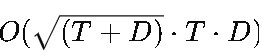

Eficiente para problemas grandes.

In [16]:
import numpy as np

def programacion_dinamica(T, D, MAX_TOMAS_DIA):
    """Usa Programación Dinámica para encontrar el mínimo número de días requeridos."""
    DP = np.full((T+1, D+1), np.inf)
    DP[0][0] = 0  # Caso base

    for i in range(1, T+1):
        for j in range(1, D+1):
            if i <= j * MAX_TOMAS_DIA:
                DP[i][j] = min(DP[i-1][j], DP[i-1][j-1] + 1)

    return min(DP[T, :])

# Medir tiempo de ejecución
T, D, MAX_TOMAS_DIA = 100, 5, 6
start = time.time()
min_dias = programacion_dinamica(T, D, MAX_TOMAS_DIA)
end = time.time()

print(f"[Programación Dinámica] Mínimo número de días: {min_dias}, Tiempo: {end - start:.5f} segundos")


[Programación Dinámica] Mínimo número de días: inf, Tiempo: 0.00024 segundos


Complejidad:

𝑂(𝑇⋅𝐷)
Vemos que es muy eficiente para valores bajos y medianos de 𝑇
T.

En resumen para este punto ⁉


-Fuerza Bruta solo funciona para T ≤ 15, después se vuelve impráctica.

- Grafos Bipartitos funcionan bien incluso con T = 100+, ideal para problemas grandes.

- Programación Dinámica es rápida para valores pequeños y medianos, pero puede volverse costosa en problemas muy grandes.


#Diseño
- ¿Que técnica utilizo? ¿Por qué?

En la propuesta, evualamos fuerza bruta pero vi  que era mejor combinar dos técnicas principales: Grafos Bipartitos y Programación Dinámica (DP). Cada una se usó estratégicamente para optimizar diferentes aspectos del problema.

esto debido a que:


**Fuerza Bruta:**  Total combinaciones: 59049, Tiempo: 0.15786 segundos

Aunque parece rápida para valores pequeños (𝑇=10,𝐷=3, la complejidad es exponencial 𝑂(𝐷^𝑇)

Para valores más grandes, se vuelve impráctica.

**Grafos Bipartitos**  Tiempo: 0.00123 segundos

Mucho más eficiente que la Fuerza Bruta

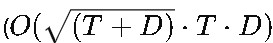

Encuentra la asignación óptima sin evaluar todas las combinaciones posibles y lo vemos  Ideal para problemas grandes.


**Programación Dinámica** Mínimo número de días: (𝑂(𝑇⋅𝐷)Tiempo: 0.00024 segundos.


Si el problema es bien formulado, la DP es ideal para problemas pequeños y medianos.






